In [102]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [4]:
# Load in the dataset
jobs = pd.read_csv('../job-etl/data/csv/job_20221107.csv')

In [32]:
# Look at first 5 rows of the dataset
jobs.head()

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
0,3333858237,Trabajos remotos de Desarrollador Full Stack,2022-10-26,Assistente,Tempo integral,Brasil,"Una empresa con sede en EE. UU., que se está e...",https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
1,3312290641,Remote React Native Developer Jobs,2022-10-16,Assistente,Tempo integral,Brasil,An industry-leading company powering automotiv...,https://br.linkedin.com/jobs/view/remote-react...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
2,3296803150,Desenvolvedor de back end,2022-10-04,Tempo integral,NaN,Curitiba e Região,Estamos procurando por desenvolvedores PHP em ...,https://br.linkedin.com/jobs/view/desenvolvedo...,NaN,"ITS - Importação, Tecnologia e Serviços",2022-10-31,2022-11-07,2022-11-07
3,3333859191,Trabajos remotos de Desarrollador Junior Back-end,2022-10-26,Assistente,Tempo integral,Brasil,Una startup emergente que tiene la misión de c...,https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
4,3177078903,Associate - BackUp Simple,2022-09-22,Assistente,Tempo integral,"São Paulo, SP",Why SoftwareONE?SoftwareONE is a leading globa...,https://br.linkedin.com/jobs/view/associate-ba...,NaN,SoftwareONE,2022-10-03,2022-11-07,2022-11-07


In [35]:
# Print out basic information about the dataset
print("Foram coletadas {} vagas para júnior e {} atributos neste dataset. \n".format(jobs.shape[0],jobs.shape[1]))
print ("Existem {} empresas contratando júniors em TI, como {}... \n".format(len(jobs.company.unique()), ", ".join(jobs.company.unique()[0:5])))
print ("Existem vagas para júnior em {} localidades, como {}... \n".format(len(jobs.location.unique()), ", ".join(jobs.location.unique()[0:5])))

Foram coletadas 750 vagas para júnior e 13 atributos neste dataset. 

Existem 262 empresas contratando júniors em TI, como Turing.com, ITS - Importação, Tecnologia e Serviços, SoftwareONE, ArcTouch, PwC Italy... 

Existem vagas para júnior em 107 localidades, como Brasil, Curitiba e Região, São Paulo, SP, Florianópolis, SC, Ribeirão do Largo, BA... 



In [36]:
# Filter out features of interest
jobs[['title', 'company', 'location']].head()

,title,company,location
0,Trabajos remotos de Desarrollador Full Stack,Turing.com,Brasil
1,Remote React Native Developer Jobs,Turing.com,Brasil
2,Desenvolvedor de back end,"ITS - Importação, Tecnologia e Serviços",Curitiba e Região
3,Trabajos remotos de Desarrollador Junior Back-end,Turing.com,Brasil
4,Associate - BackUp Simple,SoftwareONE,"São Paulo, SP"


In [57]:
# Top 10 job titles by frequency
title = jobs['title'].value_counts()
title.head(10)

App Dev Architecture - Sao Paulo                    24
Work From Home Java Developer                       16
Analista de Suporte Júnior                          11
Representante De Desenvolvimento De Vendas - SDR    10
Remote Full-Stack Developer Jobs                     8
Analista Contábil Júnior - Espanhol Avançado         7
Software Engineer - Docker Images & Community        7
Desenvolvedor De Software                            6
Remote Data Engineer Jobs                            6
Software Quality Assurance Engineer                  6
Name: title, dtype: int64

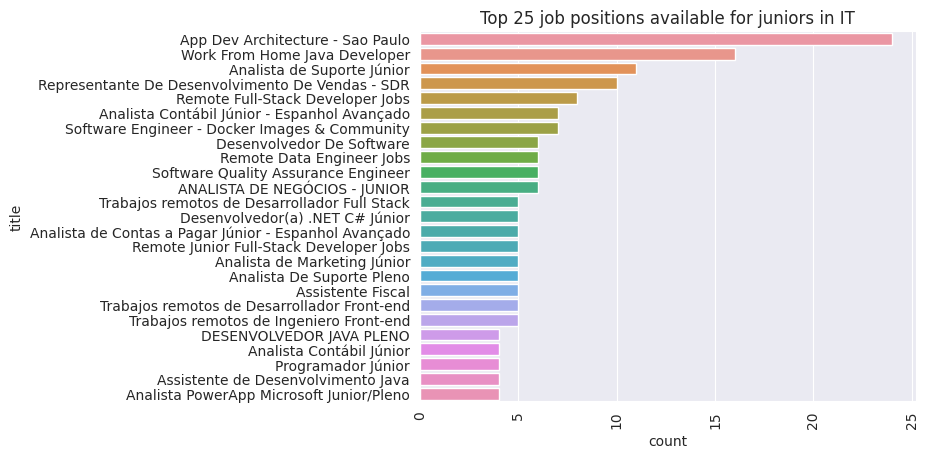

In [82]:
sns.set_style('darkgrid')
sns.countplot(y = jobs['title'],
              order = jobs['title'].value_counts().iloc[0:25].index).set(title='Top 25 job positions available for juniors in IT')
plt.xticks(rotation=90)
plt.show()

In [55]:
# Top 10 job locations by frequency
location = jobs['location'].value_counts()
location.head(10)

São Paulo, SP         165
Brasil                141
Rio de Janeiro, RJ     42
Curitiba, PR           31
Florianópolis, SC      23
Sorocaba, SP           18
Belo Horizonte, MG     17
Montenegro, RS         17
São Paulo, Brasil      16
São Paulo e Região     16
Name: location, dtype: int64

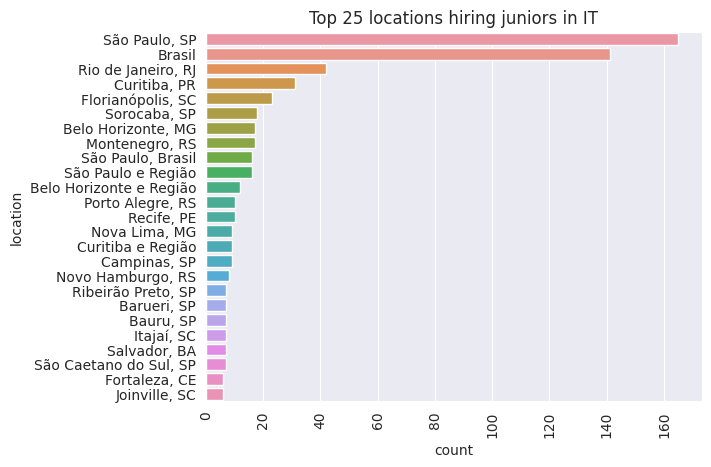

In [81]:
sns.set_style('darkgrid')
sns.countplot(y = jobs['location'],
              order = jobs['location'].value_counts().iloc[0:25].index).set(title='Top 25 locations hiring juniors in IT')
plt.xticks(rotation=90)
plt.show()

In [56]:
# Top 10 hiring companies by frequency
company = jobs['company'].value_counts()
company.head(10)

Turing.com          129
Accenture Brasil     31
Microsoft            30
Caderno Nacional     21
Burh                 19
AgileEngine          16
Workling             16
SIM                  14
innolevels           11
Ewave do Brasil      11
Name: company, dtype: int64

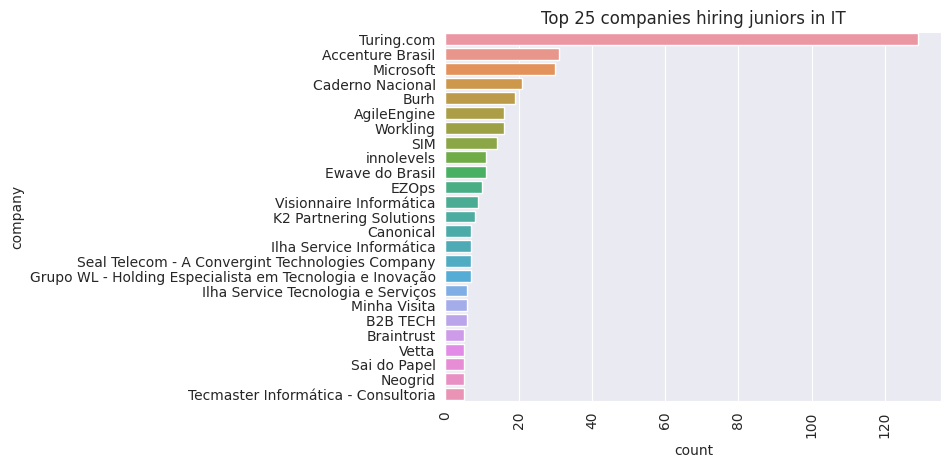

In [80]:
sns.set_style('darkgrid')
sns.countplot(y = jobs['company'],
              order = jobs['company'].value_counts().iloc[0:25].index).set(title='Top 25 companies hiring juniors in IT')
plt.xticks(rotation=90)
plt.show()

In [6]:
jobs.sample(10)

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
498,3332164761,Work From Home Java Developer,2022-10-31,Assistente,Tempo integral,"Guarulhos, SP",Location: Remote WFH - All Latin American Cand...,https://br.linkedin.com/jobs/view/work-from-ho...,NaN,Workling,2022-10-31,2022-11-07,2022-11-07
229,3311124394,Auxiliar Fiscal Junior,2022-09-16,Assistente,Tempo integral,"Sorocaba, SP",Possui interesse em ingressar em uma empresa i...,https://br.linkedin.com/jobs/view/auxiliar-fis...,NaN,Burh,2022-10-14,2022-11-07,2022-11-07
94,3315613977,Desenvolvedor(a) C# .NET Fullstack Júnior (CLT...,2022-10-24,Tempo integral,NaN,Brasil,Desenvolvedor(a) C# .NET Fullstack Júnior (CLT...,https://br.linkedin.com/jobs/view/desenvolvedo...,NaN,MAXIPROD Informática Industrial,2022-10-31,2022-11-07,2022-11-07
583,3333421895,Assistente Fiscal,2022-10-25,Assistente,Tempo integral,"São Paulo, SP",Oportunidades Tecmaster | Assistente FiscalA T...,https://br.linkedin.com/jobs/view/assistente-f...,NaN,Tecmaster Informática - Consultoria,2022-10-31,2022-11-07,2022-11-07
368,3297651691,Remote Python Developer Jobs,2022-10-04,Assistente,Tempo integral,Brasil,A fast-growing platform that provides a curate...,https://br.linkedin.com/jobs/view/remote-pytho...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07
246,3299602221,Analista de Projetos SAP MS Júnior,2022-10-02,Assistente,Tempo integral,"Curitiba, PR",Atuará nas atividades internas e demais funçõe...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,FH SERVIÇOS DE CONSULTORIA EM SISTEMAS LTDA,2022-10-03,2022-11-07,2022-11-07
725,3315661470,App Dev Architecture - Sao Paulo,2022-10-24,Assistente,Tempo integral,"Rio Grande, RS",OverviewDo you have a passion for solving the ...,https://br.linkedin.com/jobs/view/app-dev-arch...,NaN,Microsoft,2022-10-31,2022-11-07,2022-11-07
503,3276013627,Estágio em Inovação,2022-09-19,Estágio,Tempo integral,"Rio de Janeiro, RJ",Sobre nós!“Somos um grupo de inovação e invest...,https://br.linkedin.com/jobs/view/est%C3%A1gio...,NaN,Sai do Papel,2022-09-30,2022-11-07,2022-11-07
349,3282599398,Software Engineer - Docker Images & Community,2022-09-22,Assistente,Tempo integral,"Manaus, AM",Senior Software Engineer - Container Images & ...,https://br.linkedin.com/jobs/view/software-eng...,NaN,Canonical,2022-10-03,2022-11-07,2022-11-07
301,3297653468,Remote Data Engineer Jobs,2022-10-04,Assistente,Tempo integral,Brasil,A US-based company leading the market in socia...,https://br.linkedin.com/jobs/view/remote-data-...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07


In [103]:
developer = jobs[jobs['title'].str.contains('Software|Web|Mobile|Program|Dev|Desenv|Desarrol|Full|Front|Back') == True]
developer

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
0,3333858237,Trabajos remotos de Desarrollador Full Stack,2022-10-26,Assistente,Tempo integral,Brasil,"Una empresa con sede en EE. UU., que se está e...",https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
1,3312290641,Remote React Native Developer Jobs,2022-10-16,Assistente,Tempo integral,Brasil,An industry-leading company powering automotiv...,https://br.linkedin.com/jobs/view/remote-react...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
2,3296803150,Desenvolvedor de back end,2022-10-04,Tempo integral,NaN,Curitiba e Região,Estamos procurando por desenvolvedores PHP em ...,https://br.linkedin.com/jobs/view/desenvolvedo...,NaN,"ITS - Importação, Tecnologia e Serviços",2022-10-31,2022-11-07,2022-11-07
3,3333859191,Trabajos remotos de Desarrollador Junior Back-end,2022-10-26,Assistente,Tempo integral,Brasil,Una startup emergente que tiene la misión de c...,https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
4,3177078903,Associate - BackUp Simple,2022-09-22,Assistente,Tempo integral,"São Paulo, SP",Why SoftwareONE?SoftwareONE is a leading globa...,https://br.linkedin.com/jobs/view/associate-ba...,NaN,SoftwareONE,2022-10-03,2022-11-07,2022-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,3300905250,Analista Desenvolvedor Júnior,2022-10-03,Assistente,Tempo integral,"Campinas, SP",Participe do processo seletivo para Analista D...,https://br.linkedin.com/jobs/view/analista-des...,NaN,Caderno Nacional,2022-10-14,2022-11-07,2022-11-07
743,3314276150,Assistente de Desenvolvimento Java,NaN,Assistente,Tempo integral,"Florianópolis, SC",DESCRIÇÃOOPORTUNIDADE: TÉCNICO NÍVEL 2 - DESEN...,https://br.linkedin.com/jobs/view/assistente-d...,NaN,Ilha Service Tecnologia e Serviços,2022-10-14,2022-11-07,2022-11-07
745,3288054476,Work From Home Java Developer,2022-09-27,Assistente,Tempo integral,"Goiânia, GO",Location: Remote WFH - All Latin American Cand...,https://br.linkedin.com/jobs/view/work-from-ho...,NaN,Workling,2022-09-30,2022-11-07,2022-11-07
746,3297652550,Trabajos remotos de Ingeniero Líder Full Stack,2022-10-04,Assistente,Tempo integral,Brasil,Una empresa con sede en Estados Unidos que ayu...,https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07


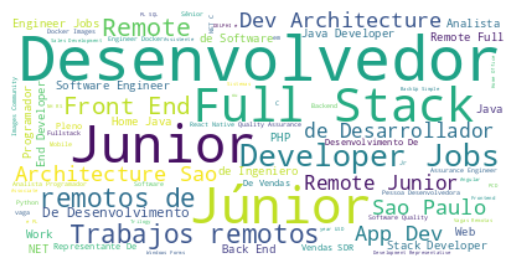

In [104]:
# Wordcloud for Developer Job Titles
words = " ".join(w for w in developer.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
support = jobs[jobs['title'].str.contains('Suporte|Support') == True]
support

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
10,3264074825,Técnico - Suporte Júnior,2022-09-12,Assistente,Tempo integral,"São José dos Pinhais, PR",Participe do processo seletivo para Técnico - ...,https://br.linkedin.com/jobs/view/t%C3%A9cnico...,NaN,Caderno Nacional,2022-09-30,2022-11-07,2022-11-07
16,3325429397,Analista de Suporte Júnior,2022-10-21,Assistente,Tempo integral,"Bauru, SP",Participe do processo seletivo para Analista d...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Caderno Nacional,2022-10-31,2022-11-07,2022-11-07
17,3303196950,Analista De Suporte Pleno,NaN,Assistente,Tempo integral,"Diadema, SP",Vaga de Analista De Suporte Pleno em São Paulo...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Infotecch,2022-10-14,2022-11-07,2022-11-07
28,3331595140,Analista De Suporte Junior - ERP Protheus,NaN,Assistente,Tempo integral,"São Paulo, SP",Vaga de Analista De Suporte Junior - ERP Proth...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Motor Fiscal Automatização de Documentos Fiscais,2022-10-31,2022-11-07,2022-11-07
33,3297941640,Auxiliar De Suporte Junior,NaN,Assistente,Tempo integral,"São Caetano do Sul, SP",Vaga de Auxiliar De Suporte Junior em São Paul...,https://br.linkedin.com/jobs/view/auxiliar-de-...,NaN,P R - SISTEMAS,2022-10-03,2022-11-07,2022-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,3306116559,(G) Técnico De Suporte - Júnior,NaN,Assistente,Tempo integral,"Campo Bom, RS",Vaga de (G) Técnico De Suporte - Júnior em Rio...,https://br.linkedin.com/jobs/view/g-t%C3%A9cni...,NaN,3AM IT Services,2022-10-14,2022-11-07,2022-11-07
697,3297957017,Analista De Suporte Implantação Júnior ERP,NaN,Assistente,Tempo integral,"Barueri, SP",Vaga de Analista De Suporte Implantação Júnior...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Over One Informática,2022-10-03,2022-11-07,2022-11-07
704,3200225835,Infrastructure Expert Support Engineer - LATAM,2022-09-14,Assistente,Tempo integral,"São Paulo, SP",Acronis is a world leader in cyber protection—...,https://br.linkedin.com/jobs/view/infrastructu...,NaN,Acronis,2022-10-03,2022-11-07,2022-11-07
719,3298303578,Analista de Suporte Técnico Júnior,2022-10-06,Assistente,Contrato,"São Paulo, SP",Sobre a vagaProcuramos pessoas que gostam de t...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Strati,2022-10-14,2022-11-07,2022-11-07


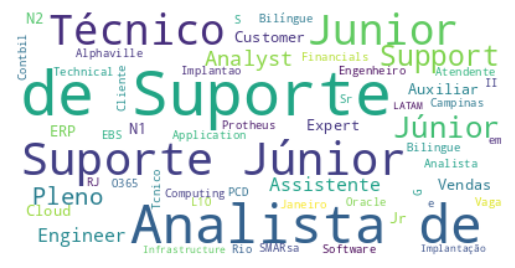

In [105]:
# Wordcloud for Support Job Titles
words = " ".join(w for w in support.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
infrastructure = jobs[jobs['title'].str.contains('Infra|Rede|Network|Cloud|AWS') == True]
infrastructure

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
127,3328087985,Analista Junior Cloud Platforms,2022-10-19,Assistente,Tempo integral,Brasil,A Keyrus acredita na diversidade e na inclusão...,https://br.linkedin.com/jobs/view/analista-jun...,NaN,Keyrus,2022-10-31,2022-11-07,2022-11-07
144,3264776485,(Evento SEnEC) - Desenvolvedor SW Junior - Clo...,2022-09-13,Assistente,Tempo integral,Campinas e Região,Job DescriptionSe você tem o espírito criativo...,https://br.linkedin.com/jobs/view/evento-senec...,NaN,SiDi,2022-09-30,2022-11-07,2022-11-07
166,3310049893,Junior Infrastructure Sales Engineer,2022-09-16,Assistente,Tempo integral,"São Paulo, SP",Descripción del puestoBuscamos profissionais e...,https://br.linkedin.com/jobs/view/junior-infra...,NaN,Adistec,2022-10-14,2022-11-07,2022-11-07
197,3156564841,Junior O365 Cloud Support,2022-09-29,Assistente,Tempo integral,"São Paulo, Brasil",Why SoftwareONE? Today SoftwareONE is a global...,https://br.linkedin.com/jobs/view/junior-o365-...,NaN,SoftwareONE,2022-09-30,2022-11-07,2022-11-07
272,3297649988,Remote Google Cloud Platform Engineer Jobs,2022-10-07,Assistente,Tempo integral,Brasil,A NASDAQ-listed company building a world-class...,https://br.linkedin.com/jobs/view/remote-googl...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07
285,3324519403,Analista de Suporte Técnico em Cloud Computing...,2022-10-20,Assistente,Tempo integral,"São Paulo, SP",Job DescriptionSe você é apaixonado por tecnol...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,BRLink,2022-10-31,2022-11-07,2022-11-07
377,3254357708,Assistente de TI / Infra Júnior,2022-09-06,Assistente,Tempo integral,"São Paulo, SP",Monitoramento Proativo da infraestrutura e sis...,https://br.linkedin.com/jobs/view/assistente-d...,NaN,Grupo SRM,2022-09-30,2022-11-07,2022-11-07
429,3313384877,Cloud Solution Architecture - App Innovation,2022-10-21,Assistente,Tempo integral,"São Paulo, SP",We are looking for a highly motivated and pass...,https://br.linkedin.com/jobs/view/cloud-soluti...,NaN,Microsoft,2022-10-31,2022-11-07,2022-11-07
446,3291713944,Analista de TI Júnior / Infraestrutura,2022-09-28,Assistente,Tempo integral,"Itajaí, SC",O que é o e-frete?Somos a solução para o pagam...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,e-frete,2022-09-30,2022-11-07,2022-11-07
475,3272990014,Analista De TI E Infraestrutura - Junior Ou Pleno,NaN,Assistente,Tempo integral,"Campo Grande, MS",Vaga de Analista De TI E Infraestrutura - Juni...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Lxtec Informática,2022-09-30,2022-11-07,2022-11-07


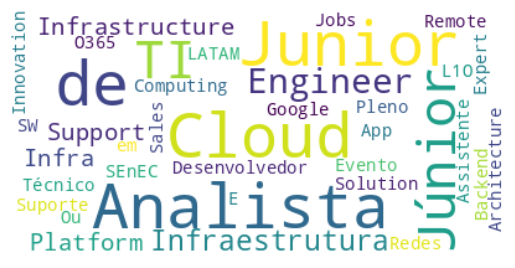

In [92]:
# Wordcloud for Infrastructure Job Titles
words = " ".join(w for w in infrastructure.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
data = jobs[jobs['title'].str.contains('Science|Business|Dados|Data|Datos|ML|AI') == True]
data

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
63,3297658023,Remote Data Engineer Jobs,2022-10-07,Assistente,Tempo integral,Brasil,An emerging company that works with financial ...,https://br.linkedin.com/jobs/view/remote-data-...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07
98,3284039730,Pessoa Product Manager Junior - Data & Analytics,2022-09-22,Assistente,Tempo integral,"Florianópolis, SC",Ajudamos pessoas a crescerem seus negócios e p...,https://br.linkedin.com/jobs/view/pessoa-produ...,NaN,RD Station,2022-09-30,2022-11-07,2022-11-07
110,3307327794,Júnior Business Analyst- Vaga afirmativa para ...,2022-10-13,Assistente,Tempo integral,"São Paulo, SP",DescriptionSobre o QuintoAndar:O QuintoAndar n...,https://br.linkedin.com/jobs/view/j%C3%BAnior-...,NaN,QuintoAndar,2022-10-14,2022-11-07,2022-11-07
176,3333854699,Trabajos remotos de Ingeniero de Datos,2022-10-26,Assistente,Tempo integral,Brasil,Una empresa con sede en EE. UU. que utiliza te...,https://br.linkedin.com/jobs/view/trabajos-rem...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
184,3312290593,Remote Data Engineer Jobs,2022-10-16,Assistente,Tempo integral,Brasil,An NYC-based startup developing predictive int...,https://br.linkedin.com/jobs/view/remote-data-...,NaN,Turing.com,2022-10-31,2022-11-07,2022-11-07
256,3301851509,Remote Data Engineer Jobs,2022-10-04,Assistente,Tempo integral,"Montenegro, RS",A US-based company leading the market in socia...,https://br.linkedin.com/jobs/view/remote-data-...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07
277,3324521120,Júnior Business Analyst- Vaga afirmativa para ...,2022-10-20,Assistente,Tempo integral,"São Paulo, SP",Sobre o QuintoAndar:O QuintoAndar nasceu para ...,https://br.linkedin.com/jobs/view/j%C3%BAnior-...,NaN,QuintoAndar,2022-10-31,2022-11-07,2022-11-07
283,3262419895,Analista Programador SDAI,2022-09-09,Assistente,Tempo integral,"São Paulo, SP","São Paulo, SP Júnior/Trainee A combinar ...",https://br.linkedin.com/jobs/view/analista-pro...,NaN,Seal Telecom - A Convergint Technologies Company,2022-09-30,2022-11-07,2022-11-07
301,3297653468,Remote Data Engineer Jobs,2022-10-04,Assistente,Tempo integral,Brasil,A US-based company leading the market in socia...,https://br.linkedin.com/jobs/view/remote-data-...,NaN,Turing.com,2022-10-14,2022-11-07,2022-11-07
330,3312861462,Business Analyst Junior,2022-09-19,Assistente,Tempo integral,Curitiba e Região,Job DescriptionThe Volvo Group is one of the w...,https://br.linkedin.com/jobs/view/business-ana...,NaN,Ewave do Brasil,2022-10-14,2022-11-07,2022-11-07


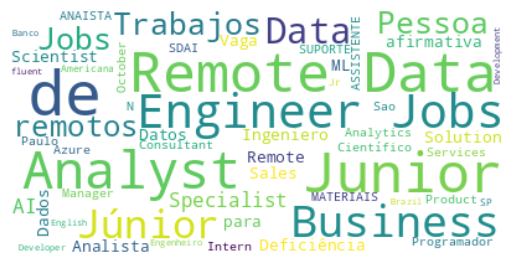

In [93]:
# Wordcloud for Data Job Titles
words = " ".join(w for w in data.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
security = jobs[jobs['title'].str.contains('Security|Segurança|Threat') == True]
security

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
250,3314256560,Especialistas em Segurança da Informação,2022-10-13,Assistente,Tempo integral,"Rio de Janeiro, RJ",Estamos contratando Especialistas em Segurança...,https://br.linkedin.com/jobs/view/especialista...,NaN,innolevels,2022-10-14,2022-11-07,2022-11-07
293,3337382532,Analista Programador Security\n \n ...,2022-10-15,Assistente,Tempo integral,"São Paulo, SP",Analista Programador Security 5 vagas SP/Brasi...,https://br.linkedin.com/jobs/view/analista-pro...,NaN,Seal Telecom - A Convergint Technologies Company,2022-10-31,2022-11-07,2022-11-07
335,3295000167,Especialistas em Segurança da Informação,2022-09-29,Assistente,Tempo integral,"Rio de Janeiro, RJ",Estamos contratando Especialistas em Segurança...,https://br.linkedin.com/jobs/view/especialista...,NaN,innolevels,2022-09-30,2022-11-07,2022-11-07
407,3329187379,Cyber Threat Intelligence Analyst,2022-10-25,Assistente,Tempo integral,"São Paulo, SP",Axurians are passionate professionals! We valu...,https://br.linkedin.com/jobs/view/cyber-threat...,NaN,Axur,2022-10-31,2022-11-07,2022-11-07
603,3268243972,"Solution Sales Specialist – Security, Complian...",2022-09-14,Assistente,Tempo integral,"Montenegro, RS",Security has never been more top of mind for g...,https://br.linkedin.com/jobs/view/solution-sal...,NaN,Microsoft,2022-10-03,2022-11-07,2022-11-07
629,3333217614,Comercial Em TI - Especialidade Segurança - Ju...,NaN,Assistente,Tempo integral,"São Paulo, SP",Vaga de Comercial Em TIEspecialidade Segurança...,https://br.linkedin.com/jobs/view/comercial-em...,NaN,AUDERE,2022-10-31,2022-11-07,2022-11-07
721,3330027752,Analista de Segurança da Informação Junior,2022-10-25,Assistente,Tempo integral,Curitiba e Região,Job DescriptionVocê é uma pessoa que gosta de ...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,Teletex IT Solutions,2022-10-31,2022-11-07,2022-11-07
747,3333486482,Analista de Segurança JUNIOR/PLENO/SENIOR,2022-10-27,Assistente,Tempo integral,"São Paulo, SP",Escopo: Serviço de gestão da área de segurança...,https://br.linkedin.com/jobs/view/analista-de-...,NaN,3AM IT Services,2022-10-31,2022-11-07,2022-11-07


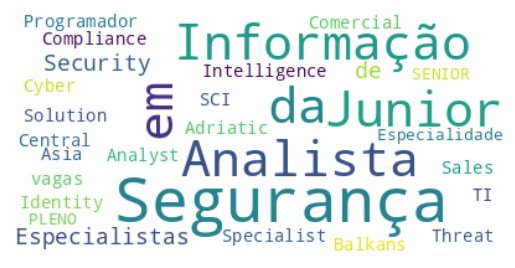

In [94]:
# Wordcloud for Security Job Titles
words = " ".join(w for w in security.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
product = jobs[jobs['title'].str.contains('Product|Produto') == True]
product

,id,title,date,level,type,location,description,link,category,company,e_date,t_date,l_date
98,3284039730,Pessoa Product Manager Junior - Data & Analytics,2022-09-22,Assistente,Tempo integral,"Florianópolis, SC",Ajudamos pessoas a crescerem seus negócios e p...,https://br.linkedin.com/jobs/view/pessoa-produ...,NaN,RD Station,2022-09-30,2022-11-07,2022-11-07
122,3279889027,Fieldguide - Lead Product Designer (Direct Hir...,2022-09-20,Assistente,Tempo integral,São Paulo e Região,ABOUT US:Braintrust is the only network that g...,https://br.linkedin.com/jobs/view/fieldguide-l...,NaN,Braintrust,2022-10-03,2022-11-07,2022-11-07
345,3305317615,Engenheiro(a) de Produtos e Projetos Eletrônicos,2022-10-06,Assistente,Tempo integral,"Curitiba, PR",Nível: TécnicoEscolaridade: Pós graduação - Cu...,https://br.linkedin.com/jobs/view/engenheiro-a...,NaN,Visionnaire,2022-10-14,2022-11-07,2022-11-07
464,3280196983,Product Owner,2022-09-21,Assistente,Tempo integral,"São João del-Rei, MG","Buscamos Product OwnerSkills: SCRUM, Gestão de...",https://br.linkedin.com/jobs/view/product-owne...,NaN,Coodesh,2022-09-30,2022-11-07,2022-11-07
624,3314237279,Engenheiro(a) de Produtos e Projetos Eletrônicos,2022-10-13,Assistente,Tempo integral,"Curitiba, PR",Buscamos profissional com experiência na área ...,https://br.linkedin.com/jobs/view/engenheiro-a...,NaN,Visionnaire Informática,2022-10-14,2022-11-07,2022-11-07


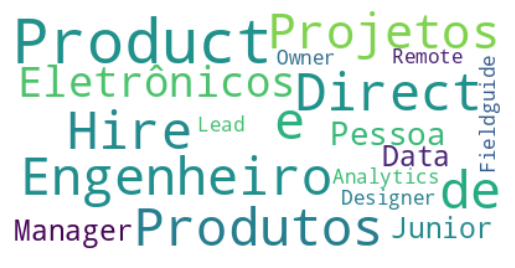

In [95]:
# Wordcloud for Product Job Titles
words = " ".join(w for w in product.title)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(words)
plt.figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()